<a href="https://colab.research.google.com/github/Orley74/Przetwarzanie_jezyka_naturalnego/blob/main/PJN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
urls = ['https://wolnelektury.pl/media/book/txt/bulhakow-fatalne-jaja.txt',
        'https://wolnelektury.pl/media/book/txt/coolidge-co-kasia-robila.txt',
        'https://wolnelektury.pl/media/book/txt/alcott-male-kobietki.txt',
        'https://wolnelektury.pl/media/book/txt/amicis-serce.txt',
        'https://wolnelektury.pl/media/book/txt/uwagi-z-powodu-listu-polaka-do-ministra-rosyjskiego.txt'
        ]

In [29]:
import requests
corp = []

corp = [requests.get(url).text for url in urls]

In [30]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

r = requests.get('https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt')
stopwords = r.json()['payload']['blob']['rawLines']

In [31]:
!python -m spacy download pl_core_news_lg

2023-11-30 13:13:09.426043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 13:13:09.426135: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 13:13:09.426187: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 13:13:13.615426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')


In [32]:
import spacy
import pl_core_news_lg

nlp = spacy.load("pl_core_news_lg")
nlp = pl_core_news_lg.load()


In [33]:
from collections import Counter

docs = []
for t in corp:
    docs.append(nlp(t))

częstość występowania części mowy

In [34]:
parts_freq = []
for doc in docs:
  docs_parts_freq = Counter()
  docs_parts_freq.update([token.pos_ for token in doc])
  parts_freq.append(docs_parts_freq)


In [35]:
print(parts_freq)

[Counter({'PUNCT': 5570, 'NOUN': 5564, 'VERB': 3437, 'ADP': 2546, 'ADJ': 2514, 'PRON': 1618, 'PROPN': 1175, 'CCONJ': 1174, 'ADV': 1044, 'PART': 765, 'SPACE': 726, 'DET': 486, 'SCONJ': 374, 'AUX': 341, 'NUM': 145, 'X': 122, 'INTJ': 111, 'SYM': 10}), Counter({'PUNCT': 9373, 'NOUN': 7509, 'VERB': 7058, 'PRON': 3686, 'ADP': 3490, 'ADJ': 3417, 'ADV': 2626, 'PROPN': 2084, 'CCONJ': 1955, 'PART': 1827, 'SCONJ': 1539, 'SPACE': 1336, 'DET': 1269, 'AUX': 1036, 'NUM': 157, 'INTJ': 132, 'SYM': 108, 'X': 22}), Counter({'PUNCT': 18111, 'NOUN': 14161, 'VERB': 13962, 'PRON': 7279, 'ADP': 6617, 'ADJ': 6375, 'ADV': 4530, 'CCONJ': 3963, 'SCONJ': 3316, 'PROPN': 3211, 'PART': 3104, 'DET': 2592, 'SPACE': 2368, 'AUX': 1642, 'NUM': 225, 'X': 139, 'INTJ': 112, 'SYM': 40}), Counter({'PUNCT': 19067, 'NOUN': 17840, 'VERB': 13384, 'ADP': 8269, 'PRON': 7383, 'ADJ': 7018, 'ADV': 4813, 'CCONJ': 4506, 'DET': 4091, 'PART': 3861, 'SPACE': 2968, 'SCONJ': 2389, 'PROPN': 1766, 'AUX': 1578, 'NUM': 564, 'INTJ': 195, 'X': 164,

Wyswietlam czestosc wystepowania dla 1 dokumentu

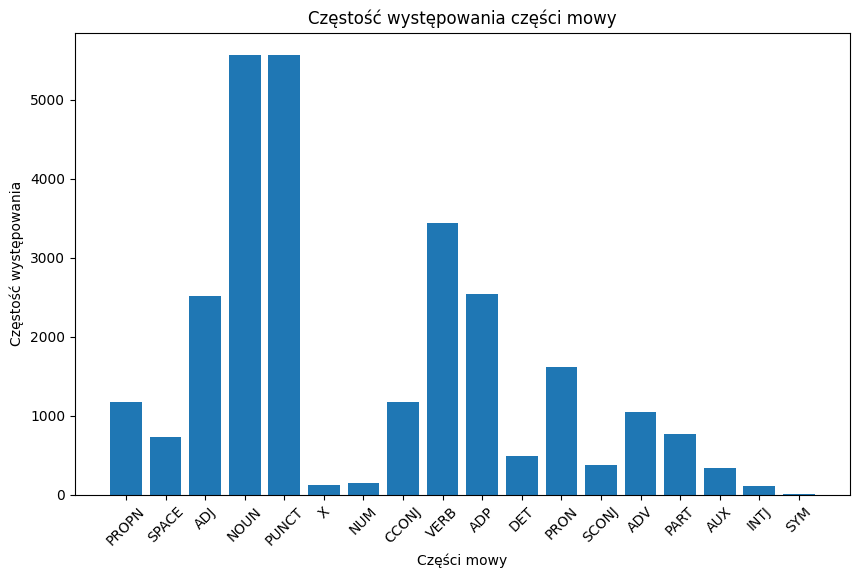

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(parts_freq[0].keys(), parts_freq[0].values())
plt.xlabel('Części mowy')
plt.ylabel('Częstość występowania')
plt.title('Częstość występowania części mowy')
plt.xticks(rotation=45)
plt.show()

In [37]:
!pip install morfeusz2

In [38]:
parts_freq = []
for doc in docs:
  docs_parts_freq = Counter()
  docs_parts_freq.update([token.tag_ for token in doc])
  parts_freq.append(docs_parts_freq)

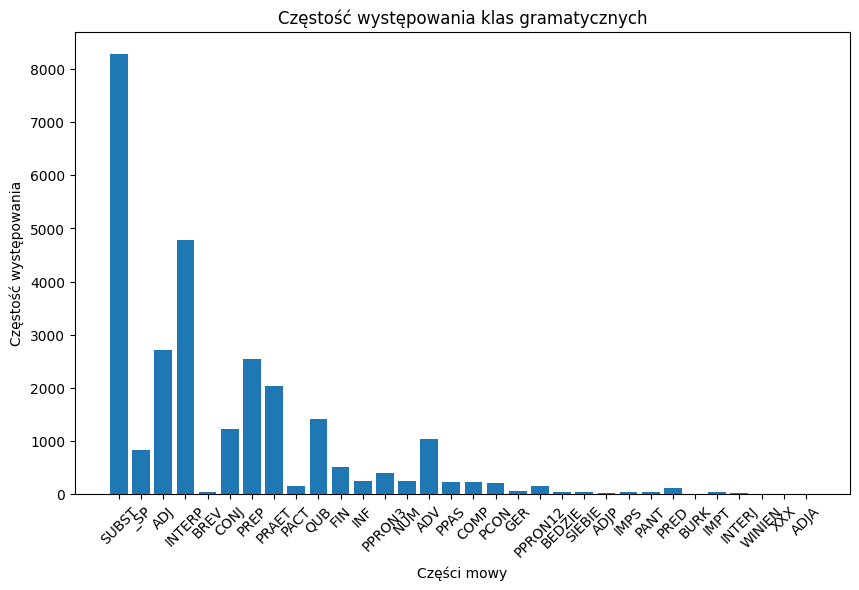

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(parts_freq[0].keys(), parts_freq[0].values())
plt.xlabel('Części mowy')
plt.ylabel('Częstość występowania')
plt.title('Częstość występowania klas gramatycznych')
plt.xticks(rotation=45)
plt.show()

In [106]:
nouns_all = []
nouns = []

for doc in docs:
  noun_cnt = Counter()
  noun_cnt.update([token.lemma_ for token in doc if token.pos_ == "NOUN"])
  nouns_all.append(noun_cnt)
  nouns.append(noun_cnt.most_common(20))



Wyswietlenie najczęściej występujących słów w 1 dokumencie

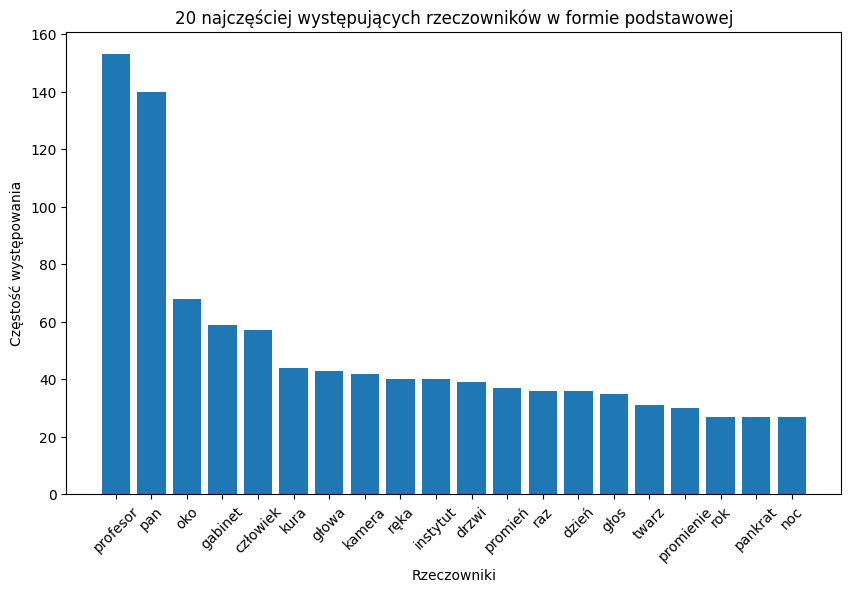

In [111]:
plt.figure(figsize=(10, 6))
labels, values = zip(*nouns[0])
plt.bar(labels, values)
plt.xlabel('Rzeczowniki')
plt.ylabel('Częstość występowania')
plt.title('20 najczęściej występujących rzeczowników w formie podstawowej')
plt.xticks(rotation=45)
plt.show()

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

Tworzenie macierzy TF-IDF

In [112]:
docs_tfidf = []
for doc in nouns_all:
  docs_tfidf.append(' '.join(doc))


# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(docs_tfidf)

chmury tagów dla wszystkich dokumentów

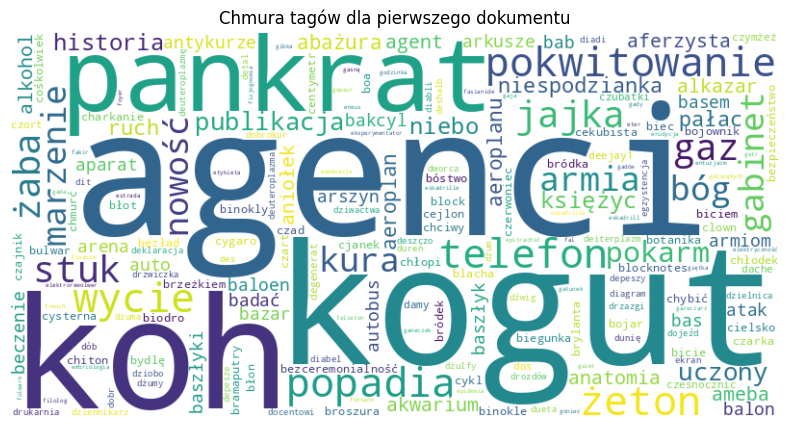

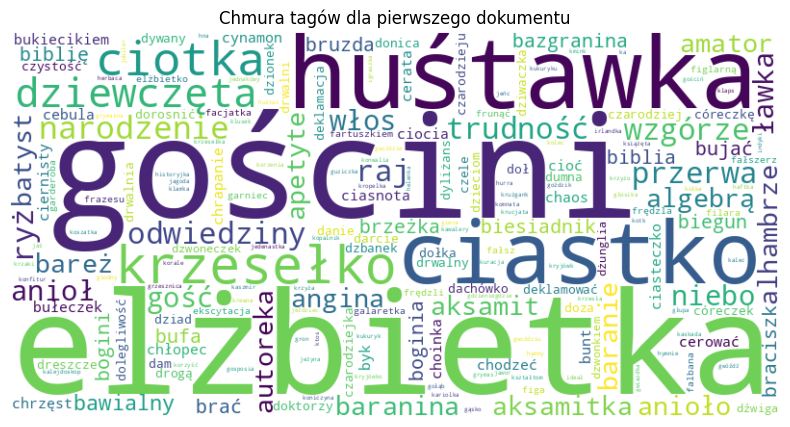

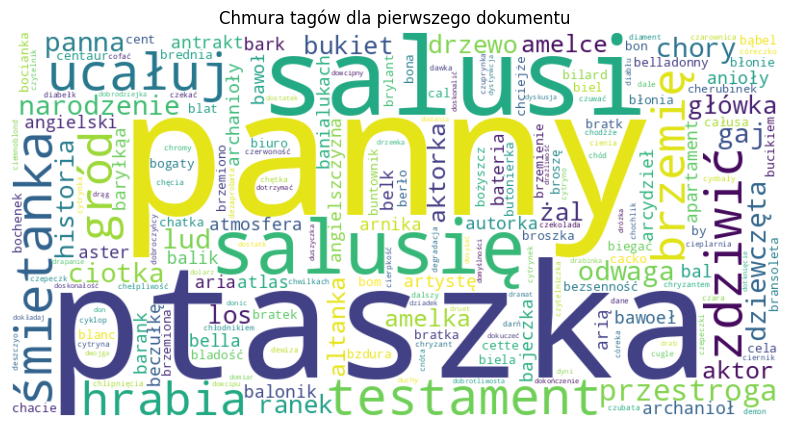

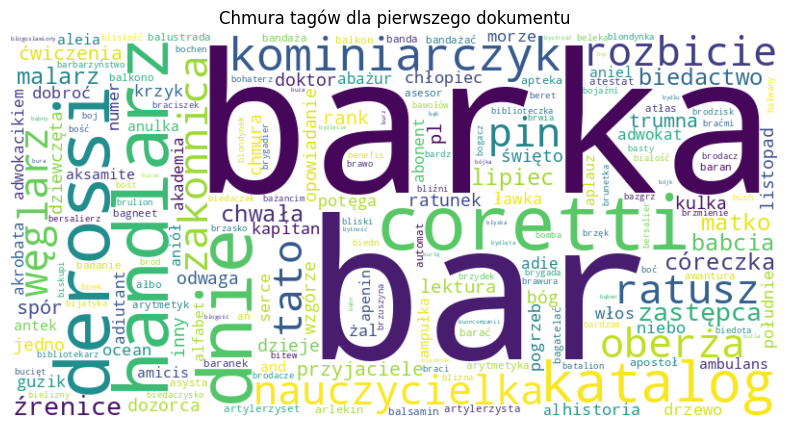

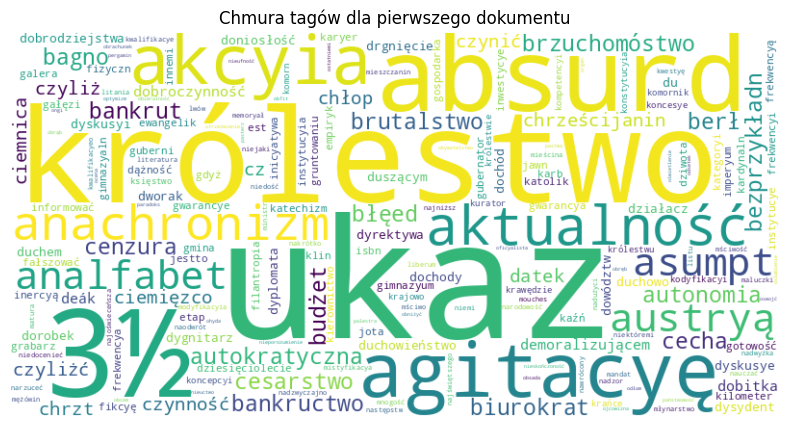

In [119]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

all_text = [' '.join(doc) for doc in nouns_all]
for i in range(0,len(corp)):

  vectorizer = CountVectorizer()
  bow_matrix = vectorizer.fit_transform(all_text)

  tfidf_transformer = TfidfTransformer()
  tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)

  frequencies = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[i]))

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"Chmura tagów dla dokumentu {i+1}")
  plt.show()

Przyklady niejednoznacznosic w dokumentach:

Homonimia:
Pojęcie, gdy słowa o identycznej formie posiadają różne znaczenia, takie jak "zamek" (budynek) i "zamek" (suwak). Aby rozwikłać niejednoznaczność, konieczne jest uwzględnienie kontekstu otaczającego dane słowo.

Polisemia:
Zjawisko, w którym jedno słowo posiada kilka powiązanych, ale odrębnych znaczeń, np. "głowa" (część ciała) i "głowa" (szef, lider). W celu klarownego zrozumienia, konieczna jest analiza kontekstu zdania oraz szerszego fragmentu tekstu.

Metafory i Idiomy:
Wyrażenia, które nie mają dosłownego znaczenia, jak np. "trzymać kciuki" (wyrażenie życzenia powodzenia). W celu zrozumienia takich konstrukcji językowych, niezbędne jest poszerzenie wiedzy o kulturze i języku oraz analiza otaczającego kontekstu.

Sposobem rozwiązania takich niejasności jest zachowanie kontekstu zdania. Można to zrobić zwracając uwagę na czasowniki lub rzeczowniki występujące bezpośrednio przed lub po słowie, które chcemy zidentyfikować.

In [47]:
all_sub_verb = []
for doc in docs:
  sub_verb = []
  for token in doc:
    if token.pos_ == "NOUN" and token.dep_ == "nsubj":
        verb = token.head
        sub_verb.append((token.text, verb.text))
  all_sub_verb.append(sub_verb)

Wyświetlam dane z dokumentu 1


In [136]:
k = 0
for token in docs[0]:
    if token.pos_ == "NOUN":
        if token.head.pos_ == "VERB":
          print(f"Rzeczownik: '{token.text}', Czasownik: '{token.head.text}'")
          k+=1
          if k>5:
            break




Rzeczownik: 'Profesor', Czasownik: 'zooinstytutu'
Rzeczownik: 'dyrektor', Czasownik: 'zooinstytutu'
Rzeczownik: 'gabinetu', Czasownik: 'wszedł'
Rzeczownik: 'Profesor', Czasownik: 'zapalił'
Rzeczownik: 'lampkę', Czasownik: 'zapalił'
Rzeczownik: 'początek', Czasownik: 'należy'
